
**Problem Statement**

The problem statement and objective for the CK+ Facial Emotion Recognition project, as described in the notebook, are centered on the challenge of accurately interpreting human emotions through technology.

**Objective**

The primary objective of this project is to demonstrate a methodology for classifying images based on facial expressions into seven distinct emotion categories. It aims to showcase the power of deep learning, specifically 2D Convolutional Neural Networks (CNN2D), in recognizing and categorizing human emotions from spatial data in images.


**Feature Extraction:**

The architecture must be designed to efficiently process facial expression images to achieve reliable results, eventually reaching an accuracy of 96.46% in this specific study.

### Importing Necessary Libraries

In [1]:
# To import the libaries

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and working with arrays
import cv2 as cv  # For image processing tasks
import os  # For interacting with the operating system, like file paths
import tensorflow as tf  # For building and training neural network models

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time data augmentation
from tensorflow.keras.models import load_model  # For loading a saved Keras model
from keras.models import Sequential  # For creating a linear stack of layers in the model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten  # For building model layers
from keras.optimizers import Adam  # For optimization algorithms
from keras.layers import BatchNormalization  # For applying Batch Normalization in neural network layers
from keras.regularizers import l2  # For applying L2 regularization to prevent overfitting
from keras.callbacks import ReduceLROnPlateau, EarlyStopping  # Importing specific callback functions

import warnings  # For handling warnings
import sys  # For interacting with the Python interpreter
if not sys.warnoptions:
    warnings.simplefilter("ignore")  # Ignore simple warnings if not already done
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignore deprecation warnings

In [2]:
#Download Annotated Dataset: We download and unzip the dataset into the datasets ckplus directory to ensure proper image-label alignment.###
%%bash

rm -rf datasets # Ensure a clean re-extraction
mkdir -p datasets/Emotion/
unzip ckplus.zip -d datasets/Emotion/

Archive:  ckplus.zip
  inflating: datasets/Emotion/CK+48/anger/S010_004_00000017.png  
  inflating: datasets/Emotion/CK+48/anger/S010_004_00000018.png  
  inflating: datasets/Emotion/CK+48/anger/S010_004_00000019.png  
  inflating: datasets/Emotion/CK+48/anger/S011_004_00000019.png  
  inflating: datasets/Emotion/CK+48/anger/S011_004_00000020.png  
  inflating: datasets/Emotion/CK+48/anger/S011_004_00000021.png  
  inflating: datasets/Emotion/CK+48/anger/S014_003_00000028.png  
  inflating: datasets/Emotion/CK+48/anger/S014_003_00000029.png  
  inflating: datasets/Emotion/CK+48/anger/S014_003_00000030.png  
  inflating: datasets/Emotion/CK+48/anger/S022_005_00000030.png  
  inflating: datasets/Emotion/CK+48/anger/S022_005_00000031.png  
  inflating: datasets/Emotion/CK+48/anger/S022_005_00000032.png  
  inflating: datasets/Emotion/CK+48/anger/S026_003_00000013.png  
  inflating: datasets/Emotion/CK+48/anger/S026_003_00000014.png  
  inflating: datasets/Emotion/CK+48/anger/S026_003_0000

In [3]:
#To convert the dataset from Grayscale to RGB

import os
from PIL import Image

def batch_convert_to_rgb(input_folder, output_folder):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            try:
                # Open the image
                img_path = os.path.join(input_folder, filename)
                with Image.open(img_path) as img:
                    # Convert to RGB (3 channels)
                    rgb_img = img.convert('RGB')

                    # Save to the new folder
                    save_path = os.path.join(output_folder, filename)
                    rgb_img.save(save_path)
                    print(f"Converted: {filename}")
            except Exception as e:
                print(f"Skipped {filename}: {e}")

# Example Usage
os.makedirs('datasets/Emotion/CK+48RGB', exist_ok=True)
batch_convert_to_rgb('/content/datasets/Emotion/CK+48/anger', '/content/datasets/Emotion/CK+48RGB/anger')
batch_convert_to_rgb('/content/datasets/Emotion/CK+48/contempt', '/content/datasets/Emotion/CK+48RGB/contempt')
batch_convert_to_rgb('/content/datasets/Emotion/CK+48/disgust', '/content/datasets/Emotion/CK+48RGB/disgust')
batch_convert_to_rgb('/content/datasets/Emotion/CK+48/fear', '/content/datasets/Emotion/CK+48RGB/fear')
batch_convert_to_rgb('/content/datasets/Emotion/CK+48/happy', '/content/datasets/Emotion/CK+48RGB/happy')
batch_convert_to_rgb('/content/datasets/Emotion/CK+48/sadness', '/content/datasets/Emotion/CK+48RGB/sadness')
batch_convert_to_rgb('/content/datasets/Emotion/CK+48/surprise', '/content/datasets/Emotion/CK+48RGB/surprise')

Converted: S066_005_00000010.png
Converted: S504_001_00000022.png
Converted: S022_005_00000032.png
Converted: S026_003_00000013.png
Converted: S071_004_00000027.png
Converted: S503_001_00000070.png
Converted: S133_003_00000047.png
Converted: S034_003_00000027.png
Converted: S075_008_00000011.png
Converted: S072_005_00000017.png
Converted: S127_010_00000016.png
Converted: S117_006_00000009.png
Converted: S067_004_00000022.png
Converted: S999_001_00000016.png
Converted: S111_006_00000010.png
Converted: S011_004_00000019.png
Converted: S037_003_00000020.png
Converted: S504_001_00000021.png
Converted: S028_001_00000022.png
Converted: S058_005_00000010.png
Converted: S090_007_00000014.png
Converted: S014_003_00000028.png
Converted: S130_007_00000020.png
Converted: S130_007_00000018.png
Converted: S032_003_00000016.png
Converted: S129_006_00000009.png
Converted: S010_004_00000019.png
Converted: S136_005_00000009.png
Converted: S082_005_00000017.png
Converted: S127_010_00000018.png
Converted:

In [4]:
#To display the count of each emotion

import os

# The base path to your dataset
base_path = "/content/datasets/Emotion/CK+48RGB"

# Verify the path exists
if os.path.exists(base_path):
    emotions = os.listdir(base_path)
    print(f"{'Emotion':<15} | {'Count':<5}")
    print("-" * 25)

    total_images = 0

    # Loop through each emotion folder
    for emotion in sorted(emotions):
        emotion_path = os.path.join(base_path, emotion)

        # Ensure we are looking at a directory
        if os.path.isdir(emotion_path):
            count = len(os.listdir(emotion_path))
            print(f"{emotion:<15} | {count:<5}")
            total_images += count

    print("-" * 25)
    print(f"{'Total':<15} | {total_images:<5}")
else:
    print("Path not found. Please check your dataset location.")

Emotion         | Count
-------------------------
anger           | 135  
contempt        | 54   
disgust         | 177  
fear            | 75   
happy           | 207  
sadness         | 84   
surprise        | 249  
-------------------------
Total           | 981  


In [5]:
#To split the data into Test and Train

import shutil
import os
import numpy as np

# Define the path to your original dataset and the paths where you want to store your train and test datasets
original_dataset_dir = '/content/datasets/Emotion/CK+48RGB'
train_dir = 'CK+48_train'
test_dir = 'CK+48_test'

# Create directories for training and testing datasets if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the split ratio
train_ratio = 0.8

# Loop through each emotion category in the original dataset
for emotion in os.listdir(original_dataset_dir):
    emotion_dir = os.path.join(original_dataset_dir, emotion)
    if os.path.isdir(emotion_dir):
        # Get a list of all the image filenames in the emotion category
        images = [f for f in os.listdir(emotion_dir) if os.path.isfile(os.path.join(emotion_dir, f))]

        # Randomly shuffle the list of image filenames
        np.random.shuffle(images)

        # Split the list of image filenames into training and testing sets
        train_size = int(len(images) * train_ratio)
        train_images = images[:train_size]
        test_images = images[train_size:]

        # Create directories for the emotion category in the train and test datasets
        train_emotion_dir = os.path.join(train_dir, emotion)
        test_emotion_dir = os.path.join(test_dir, emotion)
        os.makedirs(train_emotion_dir, exist_ok=True)
        os.makedirs(test_emotion_dir, exist_ok=True)

        # Copy the images into the corresponding directories
        for image in train_images:
            shutil.copy(os.path.join(emotion_dir, image), os.path.join(train_emotion_dir, image))
        for image in test_images:
            shutil.copy(os.path.join(emotion_dir, image), os.path.join(test_emotion_dir, image))

print("Dataset splitting complete")

Dataset splitting complete


In [6]:
#To check the format of the sample image

from PIL import Image
import os

dataset_path = "/content/CK+48_test/anger"

# Example: Listing files in that folder
files = os.listdir(dataset_path)

# Construct the full path to the image
image_file_name = 'S014_003_00000030.png'
full_image_path = os.path.join(dataset_path, image_file_name)

# Check if the file exists before trying to open it
if os.path.exists(full_image_path):
    img = Image.open(full_image_path)

    if img.mode == 'RGB':
        print("This is an RGB image.")
    elif img.mode == 'L':
        print("This is a grayscale image.")
    else:
        print(f"This image is in {img.mode} mode.")
else:
    print(f"Error: Image file not found at '{full_image_path}'.")

This is an RGB image.


In [7]:
#To give a count for the train and test dataset

import os

def count_images_in_emotion_categories(base_dir):
    emotion_counts = {}
    if not os.path.exists(base_dir):
        print(f"Directory not found: {base_dir}")
        return emotion_counts

    for emotion_category in os.listdir(base_dir):
        emotion_path = os.path.join(base_dir, emotion_category)
        if os.path.isdir(emotion_path):
            num_images = len([f for f in os.listdir(emotion_path) if os.path.isfile(os.path.join(emotion_path, f))])
            emotion_counts[emotion_category] = num_images
    return emotion_counts

# Assuming train_dir and test_dir are already defined from previous cells
train_counts = count_images_in_emotion_categories(train_dir)
test_counts = count_images_in_emotion_categories(test_dir)

print("\n--- Training Dataset Image Counts ---")
for emotion, count in train_counts.items():
    print(f"{emotion}: {count} images")

print("\n--- Testing Dataset Image Counts ---")
for emotion, count in test_counts.items():
    print(f"{emotion}: {count} images")



--- Training Dataset Image Counts ---
disgust: 141 images
sadness: 67 images
fear: 60 images
happy: 165 images
contempt: 43 images
surprise: 199 images
anger: 108 images

--- Testing Dataset Image Counts ---
disgust: 36 images
sadness: 17 images
fear: 15 images
happy: 42 images
contempt: 11 images
surprise: 50 images
anger: 27 images


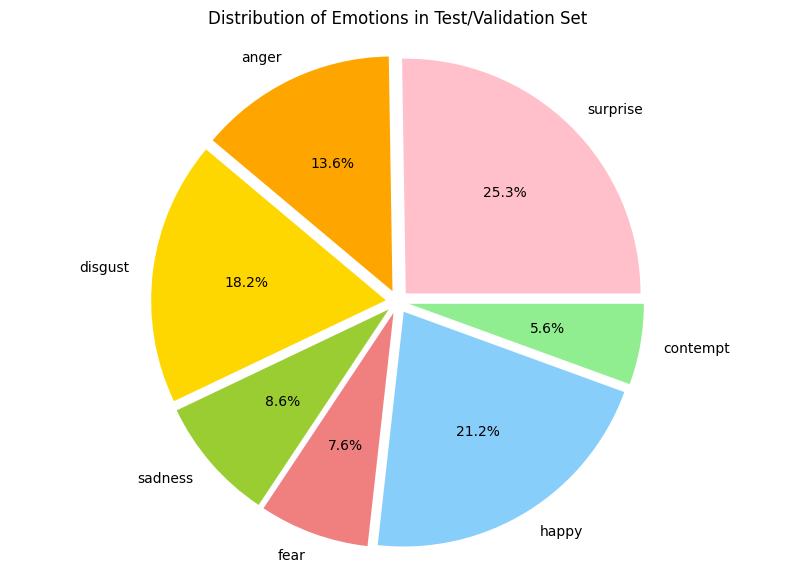

In [8]:
#To provide the piechart of the distribution of emotions in Test Validation set
import matplotlib.pyplot as plt

# Assuming test_counts is defined from a previous cell execution
counts = list(test_counts.values())
labels = list(test_counts.keys())

# Define colors for the pie chart
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'orange']

plt.figure(figsize=(10, 7))
plt.pie(counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)) # Slightly separates the slices

plt.title('Distribution of Emotions in Test/Validation Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/tmp/ipython-input-3042014791.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette="viridis")


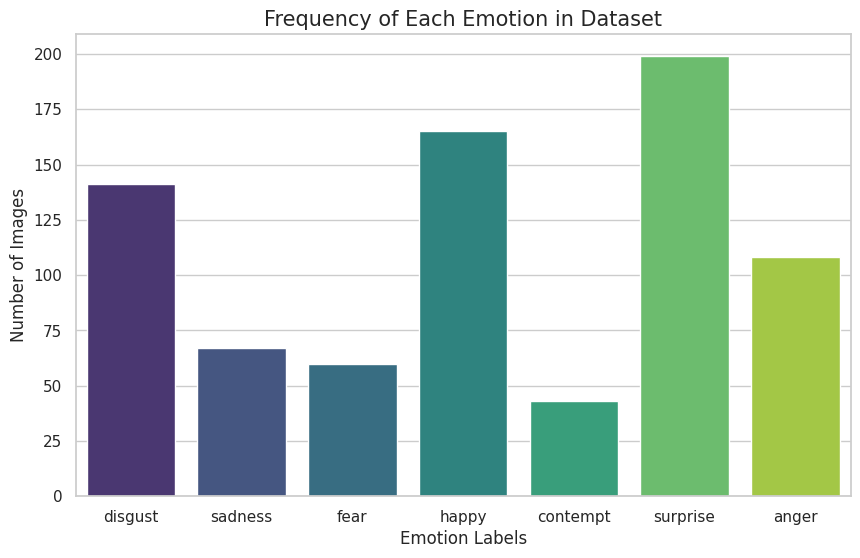

In [9]:
#To show the frequency of each emotion in dataset
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Assuming 'train_dir' is the path to your dataset folders
emotions = os.listdir(train_dir)
data = []

for emotion in emotions:
    path = os.path.join(train_dir, emotion)
    count = len(os.listdir(path))
    # Create a list of labels to represent the actual distribution
    data.extend([emotion] * count)

# Create the countplot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.countplot(x=data, palette="viridis")

plt.title('Frequency of Each Emotion in Dataset', fontsize=15)
plt.xlabel('Emotion Labels')
plt.ylabel('Number of Images')
plt.show()

### Extracting the Dimensions of the image

In [10]:
#Extract the Dimension of the image
import cv2
import os # Ensure os is imported for path checking

image_path = '/content/CK+48_train/anger/S010_004_00000019.png'

if os.path.exists(image_path):
    print(f"Attempting to load image from: {image_path}")
    img = cv2.imread(image_path)
    if img is not None:
        # Get dimensions
        height, width, channels = img.shape
        print(f'Dimensions: {width}x{height}')
    else:
        print(f"Error: cv2.imread returned None. Image at '{image_path}' might be corrupted or in an unsupported format.")
else:
    print(f"Error: Image file not found at '{image_path}'.")
    # Additional check: see if it's in the test directory
    test_image_path = image_path.replace('CK+48_train', 'CK+48_test')
    if os.path.exists(test_image_path):
        print(f"Note: The image was found in the test directory: '{test_image_path}'. It might have been assigned to the test set during data splitting.")
    else:
        print("The image was not found in either the train or test directories for 'disgust'.")

Attempting to load image from: /content/CK+48_train/anger/S010_004_00000019.png
Dimensions: 48x48


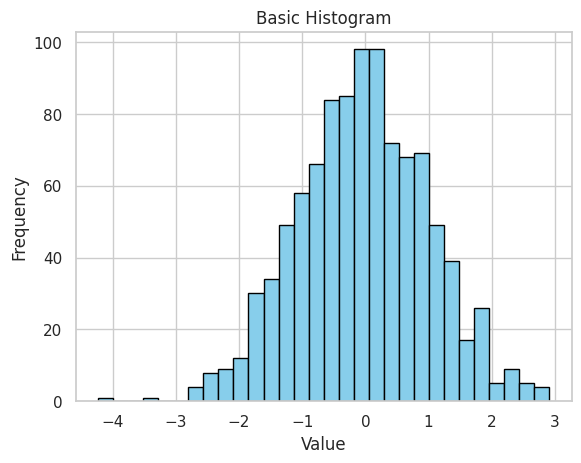

In [11]:
#To show the Histogram of the data
import matplotlib.pyplot as plt
import numpy as np

# Sample data: 1000 random points from a normal distribution
data = np.random.normal(size=1000)

# Create the histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

Found 783 images belonging to 7 classes.
X_train_sample shape: (64, 48, 48, 3)
y_train_sample shape: (64,)
train_labels_dict: {0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happy', 5: 'sadness', 6: 'surprise'}


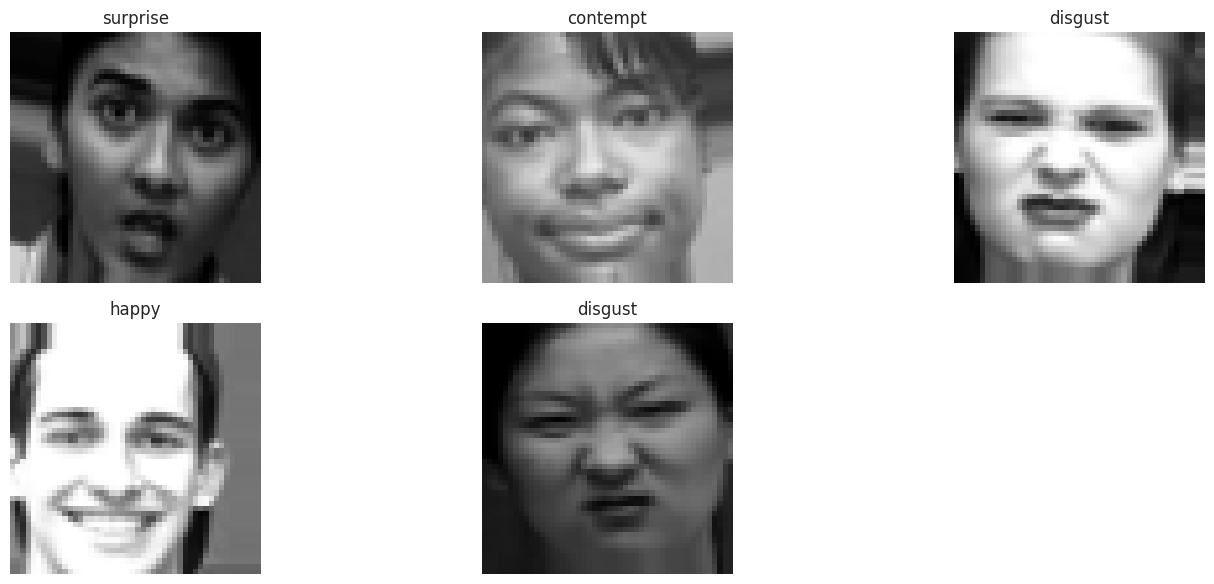

In [12]:
#create a data generator with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def plot_samples(X, y, labels_dict, n=10):
    """
    Plots n random samples from the dataset.

    Args:
        X (np.ndarray): Array of image data.
        y (np.ndarray): Array of integer labels.
        labels_dict (dict): Dictionary mapping integer labels to string emotion names.
        n (int): Number of samples to plot.
    """
    plt.figure(figsize=(15, 6))
    num_cols = int(np.ceil(n / 2.0)) # Calculate columns needed for 2 rows
    for i in range(min(n, len(X))):
        ax = plt.subplot(2, num_cols, i + 1)
        plt.imshow(X[i])
        plt.title(labels_dict[y[i]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

train_data_generator = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values (normalization)
    rotation_range=15,  # Random rotation in the range of 10 degrees
    width_shift_range=0.10,  # Random horizontal shifts
    height_shift_range=0.10,  # Random vertical shifts
    shear_range=0.10,  # Random shearing transformations
    zoom_range=0.10,  # Random zoom range
    horizontal_flip=True  # Randomly flip inputs horizontally
)

# Load images from the directory and apply the defined transformations
fer_training_data = train_data_generator.flow_from_directory(
    '/content/CK+48_train',  # Corrected path to the training data
    target_size=(48, 48),  # Resize images to 48x48
    batch_size=64,  # Number of images to yield per batch
    color_mode='rgb',  # Load images in rgb
    class_mode='categorical'  # Labels will be returned in categorical format
)

# Get one batch of data from the training generator
X_train_sample, y_train_sample_one_hot = next(fer_training_data);

# Convert one-hot encoded labels to integer labels
y_train_sample = np.argmax(y_train_sample_one_hot, axis=1);

# Create a mapping from integer index to class name for plot_samples
# fer_training_data.class_indices gives {'emotion_name': integer_index}
# We need {integer_index: 'emotion_name'}
train_labels_dict = {v: k for k, v in fer_training_data.class_indices.items()};

print(f"X_train_sample shape: {X_train_sample.shape}")
print(f"y_train_sample shape: {y_train_sample.shape}")
print(f"train_labels_dict: {train_labels_dict}")

# Now, use the plot_samples function with the prepared data
# We will plot fewer samples (e.g., 5 per class) to avoid too many plots
plot_samples(X_train_sample, y_train_sample, train_labels_dict, n=5)

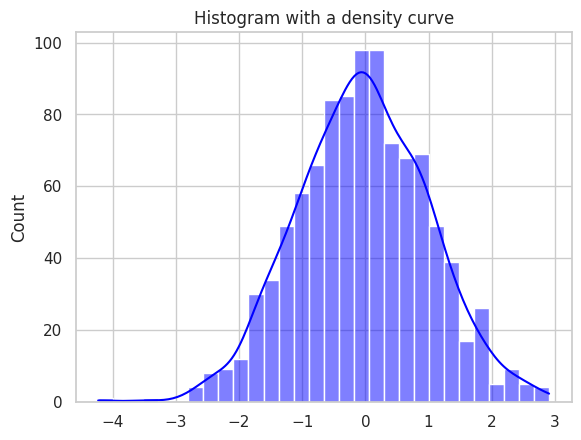

In [14]:
# Create a histogram with a density curve.
import seaborn as sns

sns.histplot(data=data, bins=30, kde=True, color='blue')
plt.title('Histogram with a density curve')

plt.show()

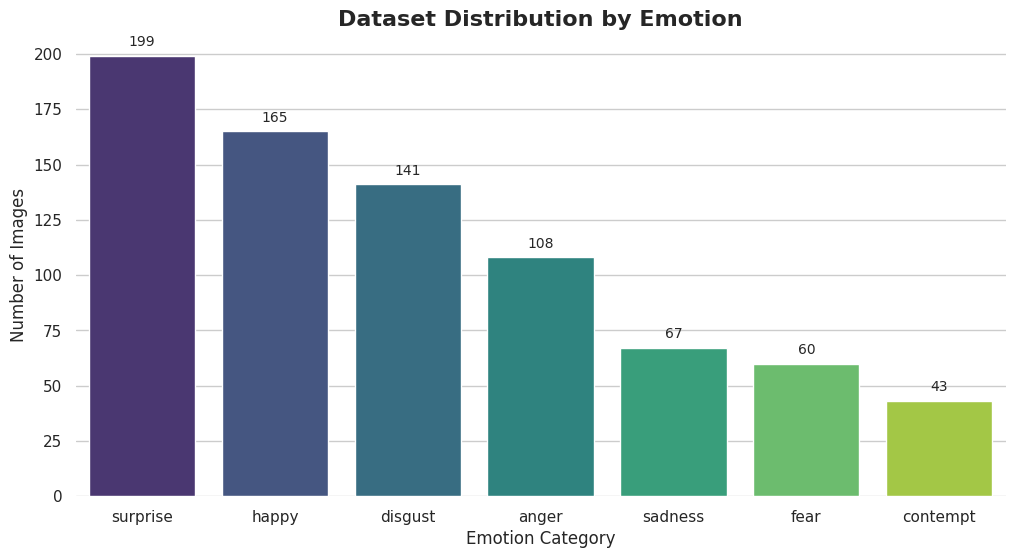

In [16]:
#Dataset Distribution By Emotions

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define valid image extensions
valid_ext = ('.jpg', '.jpeg', '.png', '.bmp')

# 1. Collect counts (filtering for actual images)
emotions = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
emotion_counts = {
    emotion: len([f for f in os.listdir(os.path.join(train_dir, emotion)) if f.lower().endswith(valid_ext)])
    for emotion in emotions
}

# 2. Convert and Sort
emotion_dist_df = pd.DataFrame(list(emotion_counts.items()), columns=['Emotion', 'Count']).sort_values('Count', ascending=False)

# 3. Plotting
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(data=emotion_dist_df, x='Emotion', y='Count', hue='Emotion', palette='viridis', legend=False)

# Annotate values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.title('Dataset Distribution by Emotion', fontsize=16, fontweight='bold')
plt.xlabel('Emotion Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
sns.despine(left=True, bottom=True) # Optional: cleaner look
plt.show()

In [17]:
#This code is a feature extractor. It transforms a folder of raw
#images into a structured table (DataFrame) that a computer can analyze statistically.

import os
import pandas as pd
from PIL import Image
import numpy as np

data_rows = [] # Renamed from 'data' to avoid confusion
valid_ext = ('.jpg', '.jpeg', '.png')

for emotion in os.listdir(train_dir):
    emotion_path = os.path.join(train_dir, emotion)
    if os.path.isdir(emotion_path):
        for img_name in os.listdir(emotion_path):
            if img_name.lower().endswith(valid_ext):
                img_path = os.path.join(emotion_path, img_name)

                with Image.open(img_path) as img:
                    width, height = img.size
                    # Convert to grayscale to calculate mean brightness
                    brightness = np.array(img.convert('L')).mean()

                    data_rows.append({
                        'emotion': emotion,
                        'width': width,
                        'height': height,
                        'aspect_ratio': width / height,
                        'brightness': brightness,
                        'file_size_kb': os.path.getsize(img_path) / 1024
                    })

# Now you have a DataFrame!
image_features_df = pd.DataFrame(data_rows) # Renamed to image_features_df


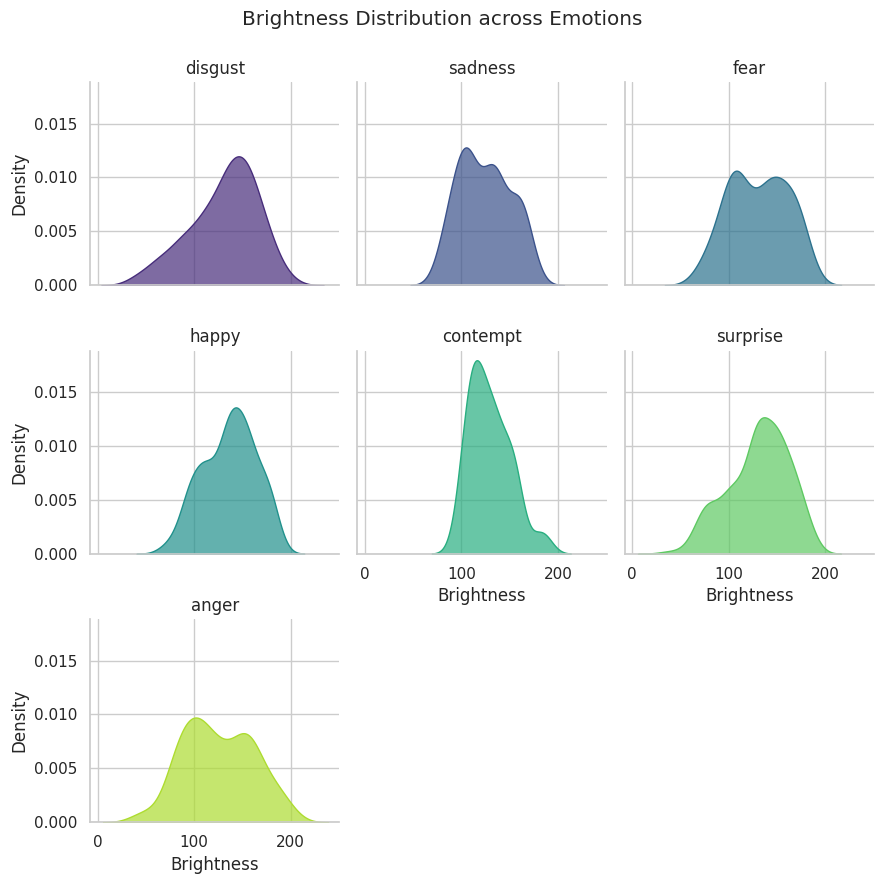

In [18]:
# Create a grid where each emotion gets its own small plot
g = sns.FacetGrid(image_features_df, col="emotion", hue="emotion", palette="viridis", col_wrap=3, height=3)

# Map the kdeplot onto the grid
g.map(sns.kdeplot, "brightness", fill=True, alpha=0.7)

# Add titles and clean up
g.set_axis_labels("Brightness", "Density")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Brightness Distribution across Emotions')
plt.show()

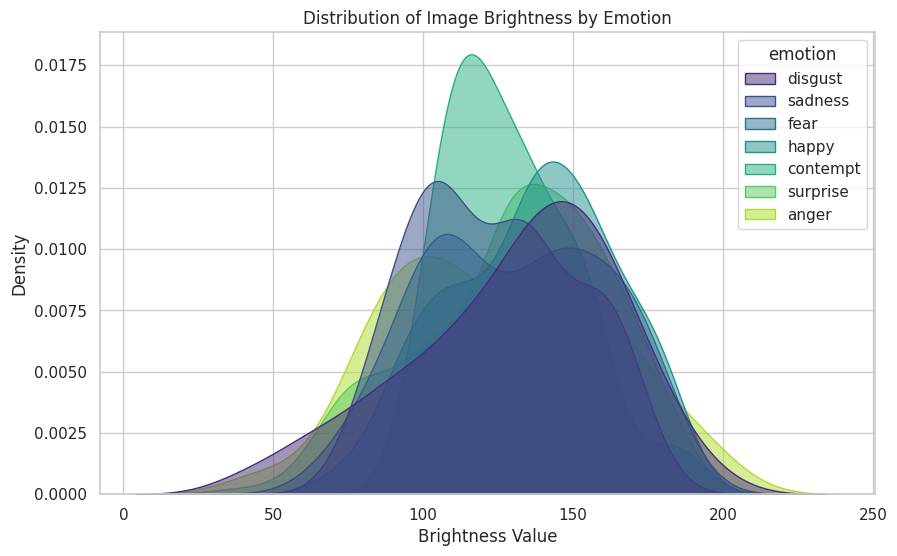

In [19]:
#To Plot the Distribution of Image Brightness by Emotions

plt.figure(figsize=(10, 6))
sns.kdeplot(data=image_features_df, x='brightness', hue='emotion', fill=True, common_norm=False, palette='viridis', alpha=.5)

plt.title('Distribution of Image Brightness by Emotion')
plt.xlabel('Brightness Value')
plt.ylabel('Density')
plt.show()

### Creating a Training Image Data Generator

In [20]:
#creates an augmented image data generator that normalizes and randomly transforms training images,
#then loads emotion images from a directory in batches to prepare them for CNN model training.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with augmentation
train_data_generator = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values (normalization)
    rotation_range=10,  # Random rotation in the range of 15 degrees
    width_shift_range=0.10,  # Random horizontal shifts (15% of total width)
    height_shift_range=0.10,  # Random vertical shifts (15% of total height)
    shear_range=0.10,  # Random shearing transformations
    zoom_range=0.10,  # Random zoom range
    horizontal_flip=True  # Randomly flip inputs horizontally
)

# Load images from the directory and apply the defined transformations
fer_training_data = train_data_generator.flow_from_directory(
    '/content/CK+48_train',  # Corrected path to the training data
    target_size=(48, 48),  # Resize images to 48x48
    batch_size=64,  # Number of images to yield per batch
    color_mode='rgb',  # Load images in rgb
    class_mode='categorical'  # Labels will be returned in categorical format
)

fer_training_data

Found 783 images belonging to 7 classes.


### Creating a Test Image Data Generator

In [22]:
# Initialize an ImageDataGenerator for test data with rescaling
# Rescales images by dividing pixel values by 255 (normalization)
test_data_generator = ImageDataGenerator(rescale=1./255)

# Creates a data generator for the test dataset
# flow_from_directory method loads images from a directory,
# in this case, '/kaggle/working/CK+48_test'
fer_test_data = test_data_generator.flow_from_directory(
    '/content/CK+48_test',  # Directory path for test images
    target_size = (48, 48),  # Resizes images to 48x48 pixels
    batch_size = 64,  # Number of images to yield per batch
    color_mode = 'rgb',  # Specifies that images are in rgb
    class_mode = 'categorical'  # Images are classified categorically
)

# fer_test_data is now a generator that yields batches of test images and their labels
fer_test_data

Found 198 images belonging to 7 classes.


In [23]:
# Importing the optimizers module from TensorFlow's Keras library
from tensorflow.keras import optimizers

# Initializing a list of optimizers with specific configurations
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

# Defining the Model

In [24]:
#Define the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Block 1: Input
model.add(Conv2D(64, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2: Increase filters consistently
model.add(Conv2D(128, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 3: High-level features
model.add(Conv2D(256, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Final Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # Increased dropout for the dense layer to prevent overfitting
model.add(Dense(7, activation='softmax'))

# Compilation with your fix
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,511,367 (13.39 MB)

 Trainable params: 3,509,063 (13.39 MB)

 Non-trainable params: 2,304 (9.00 KB)

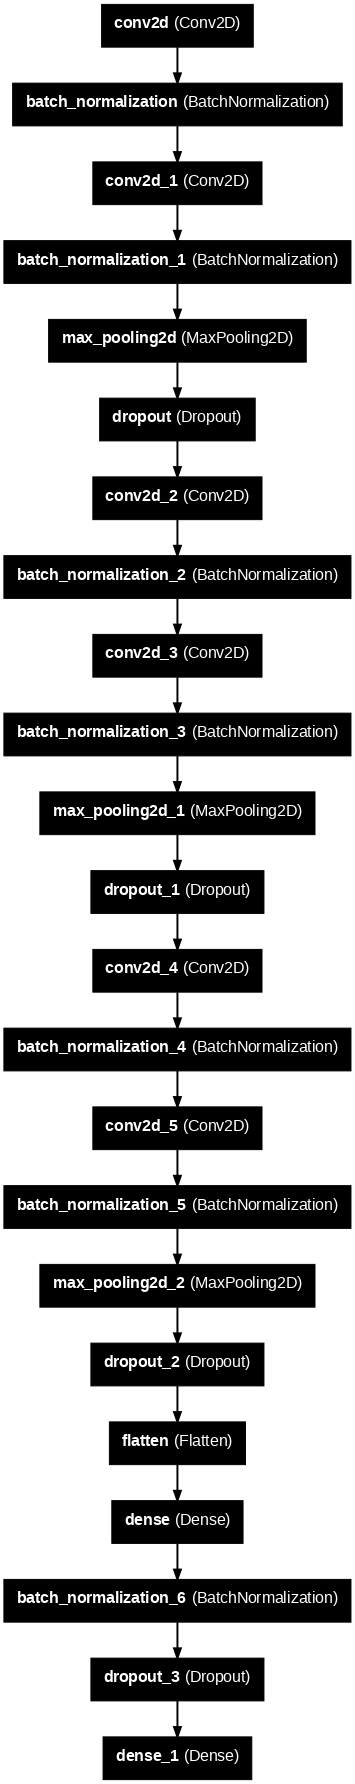

In [25]:
#Plot the model summary
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model_optimized.png',
    show_shapes=False,      # Saves vertical space
    show_layer_names=True,
    rankdir='TB',           # Vertical is usually better for CNNs
    dpi=70                  # Shrinks overall size
)

### Callbacks

In [26]:
#sets up training callbacks to stop model training early when validation accuracy stops improving and
#to automatically reduce the learning rate to improve convergence and prevent overfitting.

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Reduce learning rate when a metric has stopped improving
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

# Training the Model

In [27]:
#utomatically saves the model weights to a file whenever the validation accuracy
#improves, ensuring that only the best-performing CNN model is kept

from keras.callbacks import ModelCheckpoint

# Define the checkpoint to save the best model
checkpoint = ModelCheckpoint(
    'best_cnn_RGB.keras', # You can use .h5 or .keras for Keras models
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [28]:
# Assuming fer_training_data and fer_test_data are already defined and loaded
# from previous cells (fvqYHgylYAoh and 8Nvz5RU5YAoi).

from sklearn.utils import class_weight
import numpy as np

# Calculate class weights from the fer_training_data generator
# fer_training_data is available from cell fvqYHgylYAoh
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(fer_training_data.classes),
    y=fer_training_data.classes
)
class_weights = dict(enumerate(weights))

print("Class weights calculated successfully based on fer_training_data.")

Class weights calculated successfully based on fer_training_data.


In [29]:
# Assuming class_weights is already calculated from fer_training_data
# in a previous cell, and fer_training_data and fer_test_data are available.

history = model.fit(
    fer_training_data,              # Use the training data generator
    epochs=100,                     # Using 100 epochs as per original commented code in this cell
    validation_data=fer_test_data,  # Use the test data generator
    class_weight=class_weights,
    callbacks=callbacks + [checkpoint]
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.2084 - loss: 2.9947
Epoch 1: val_accuracy improved from -inf to 0.21717, saving model to best_cnn_RGB.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 931ms/step - accuracy: 0.2119 - loss: 2.9785 - val_accuracy: 0.2172 - val_loss: 8.8121 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4322 - loss: 2.0453
Epoch 2: val_accuracy did not improve from 0.21717
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4349 - loss: 2.0386 - val_accuracy: 0.1919 - val_loss: 12.7791 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5361 - loss: 1.7393
Epoch 3: val_accuracy improved from 0.21717 to 0.38889, saving model to best_cnn_RGB.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.5377 - loss: 1.7355 - val_accuracy: 0.3889 - val_loss: 3.7505 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6275 - loss: 1.4552
Epoch 4: val_

In [30]:
#To save the model.

model.save('best_cnn_RGB.keras')

# Visualizing Loss and Accuracy

# Model Evaluation

In [31]:
# Evaluate the model on the Validation dataset
test_loss, test_accuracy = model.evaluate(fer_test_data)
print(f"Test Validation Loss: {test_loss:.4f}")
print(f"Test Validation Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9769 - loss: 0.6220
Test Validation Loss: 0.6215
Test Validation Accuracy: 0.9747


In [32]:
# Evaluate the model on the training dataset
loss, accuracy = model.evaluate(fer_training_data, verbose=1)

# Print the loss and accuracy
print(f'Train Loss: {loss}')
print(f'Train Accuracy: {accuracy * 100:.2f}%')

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9435 - loss: 0.6697
Train Loss: 0.6837988495826721
Train Accuracy: 94.13%


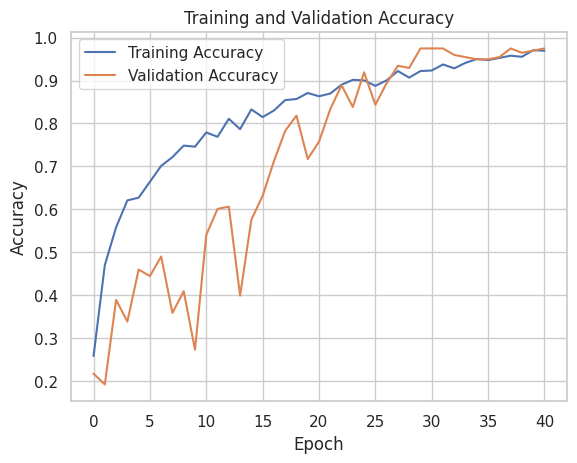

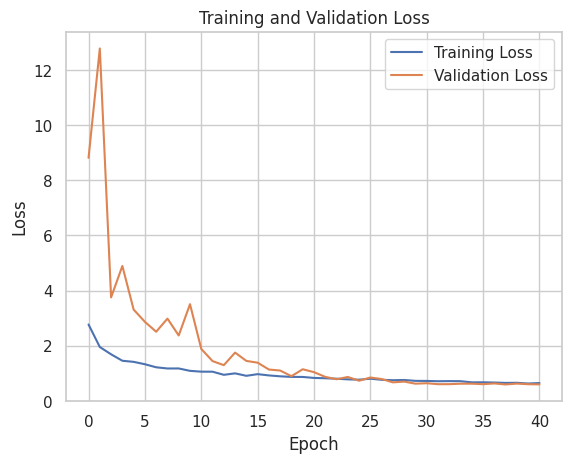

In [33]:
#To plot Training and Validation Accuracy + Training and Validation Loss
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit()

# Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss plot
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [34]:
#Loads and normalizes all test images from a directory, converts them into NumPy
#arrays with both one-hot and integer labels, and prepares the test dataset for model evaluation.

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize an ImageDataGenerator for test data with rescaling
# Rescales images by dividing pixel values by 255 (normalization)
test_data_generator = ImageDataGenerator(rescale=1./255)

# Creates a data generator for the test dataset
# flow_from_directory method loads images from a directory,
# in this case, '/kaggle/working/CK+48_test'
fer_test_data = test_data_generator.flow_from_directory(
    '/content/CK+48_test',  # Directory path for test images
    target_size = (48, 48),  # Resizes images to 48x48 pixels
    batch_size = 64,  # Number of images to yield per batch
    color_mode = 'rgb',  # Specifies that images are in rgb
    class_mode = 'categorical'  # Images are classified categorically
)

# Load all data from the test generator into NumPy arrays
all_X_test = []
all_y_test_one_hot = []

# Reset the test generator to ensure it starts from the beginning
fer_test_data.reset()

# Iterate through the test generator to collect all data
for _ in range(len(fer_test_data)):
    X_batch_test, y_batch_test_one_hot = next(fer_test_data)
    all_X_test.append(X_batch_test)
    all_y_test_one_hot.append(y_batch_test_one_hot)

# Concatenate all batches to form the full X_test and y_test_one_hot arrays
X_test = np.concatenate(all_X_test)
Y_test = np.concatenate(all_y_test_one_hot) # Renamed to Y_test for consistency with ROC curve later

# Convert one-hot encoded labels back to integer labels
y_test = np.argmax(Y_test, axis=1);

# Get the label mapping from the test generator
test_labels = {v: k for k, v in fer_test_data.class_indices.items()}

# Define NUM_CLASSES for later use (e.g., ROC curve)
NUM_CLASSES = len(test_labels)

print(f"X_test shape: {X_test.shape}")
print(f"y_test (integer labels) shape: {y_test.shape}")
print(f"Y_test (one-hot encoded) shape: {Y_test.shape}")

Found 198 images belonging to 7 classes.
X_test shape: (198, 48, 48, 3)
y_test (integer labels) shape: (198,)
Y_test (one-hot encoded) shape: (198, 7)


In [35]:
#To demo no of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TEST_DIR = 'CK+48_test' # Define TEST_DIR
batch_size = 64
datagen_test = ImageDataGenerator(rescale = 1./255)
pred_generator = datagen_test.flow_from_directory(TEST_DIR,
                                                 target_size = (48,48),
                                                 color_mode = "rgb",
                                                 batch_size = batch_size,
                                                 class_mode = "categorical",
                                                 shuffle=False)

Found 198 images belonging to 7 classes.


In [36]:
TEST_DIR = test_dir # Using the previously defined test_dir variable
print(f"TEST_DIR is set to: {TEST_DIR}")

TEST_DIR is set to: CK+48_test


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

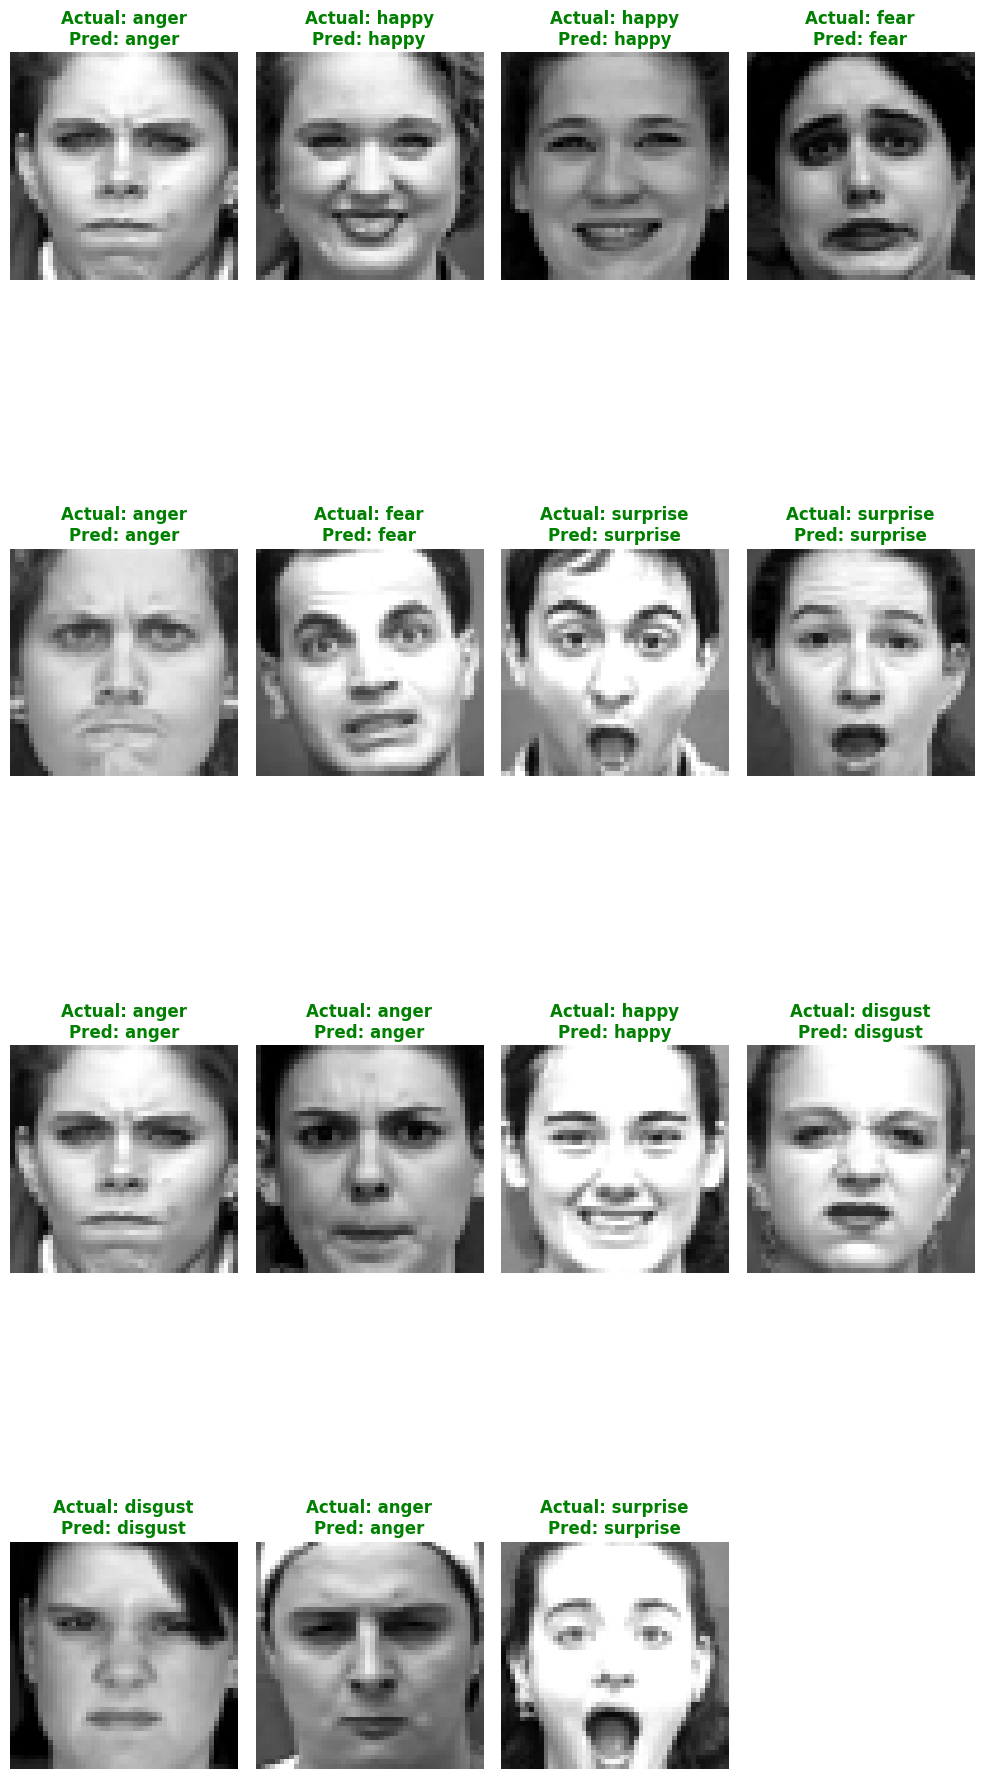

In [38]:
#To demo the 15 results
import matplotlib.pyplot as plt
import numpy as np

def show_15_predictions(model, data_generator):
    # 1. Get a batch of images and their REAL labels
    # We loop to collect enough images for 15 samples
    x_list, y_list = [], []
    while len(x_list) < 15:
        x_batch, y_batch = next(data_generator)
        x_list.extend(x_batch)
        y_list.extend(y_batch)

    x_samples = np.array(x_list[:15])
    y_true = np.array(y_list[:15])

    # 2. Map indices back to Emotion Names
    class_indices = data_generator.class_indices
    class_names = {v: k for k, v in class_indices.items()}

    # 3. Generate Model Predictions
    preds = model.predict(x_samples, verbose=0)

    # 4. Setup Plot (5 rows, 4 columns)
    plt.figure(figsize=(10, 25))

    for i in range(15):
        plt.subplot(5, 4, i + 1)

        # Display Image
        plt.imshow(x_samples[i])

        # Determine Actual vs Predicted
        actual_idx = np.argmax(y_true[i])
        pred_idx = np.argmax(preds[i])

        actual_label = class_names[actual_idx]
        pred_label = class_names[pred_idx]

        # Color code: Green if correct, Red if wrong
        color = "green" if actual_idx == pred_idx else "red"

        plt.title(f"Actual: {actual_label}\nPred: {pred_label}",
                  color=color, fontsize=12, fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run the function
show_15_predictions(model, fer_test_data)


**F1-Score:** The harmonic mean of the two—this is the best single metric for "balanced" performance.

**Confusion Matrix (Heatmap):** Look at the diagonal line from top-left to bottom-right. Darker blue squares on the diagonal mean the model is highly accurate. Any numbers outside that diagonal show you exactly where the model "got confused" (e.g., if it predicted "Sad" when the label was actually "Fear").

**Raw Confusion Matrix:** This shows the absolute number of correct and incorrect predictions for each emotion.

**Normalized Confusion Matrix:** This displays the proportions of correct and incorrect predictions, making it easier to compare performance across different classes, especially if the dataset is imbalanced.

Found 198 images belonging to 7 classes.
Classification Report:

              precision    recall  f1-score   support

       anger       1.00      0.85      0.92        27
    contempt       0.92      1.00      0.96        11
     disgust       1.00      1.00      1.00        36
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        42
     sadness       0.80      0.94      0.86        17
    surprise       1.00      1.00      1.00        50

    accuracy                           0.97       198
   macro avg       0.96      0.97      0.96       198
weighted avg       0.98      0.97      0.98       198



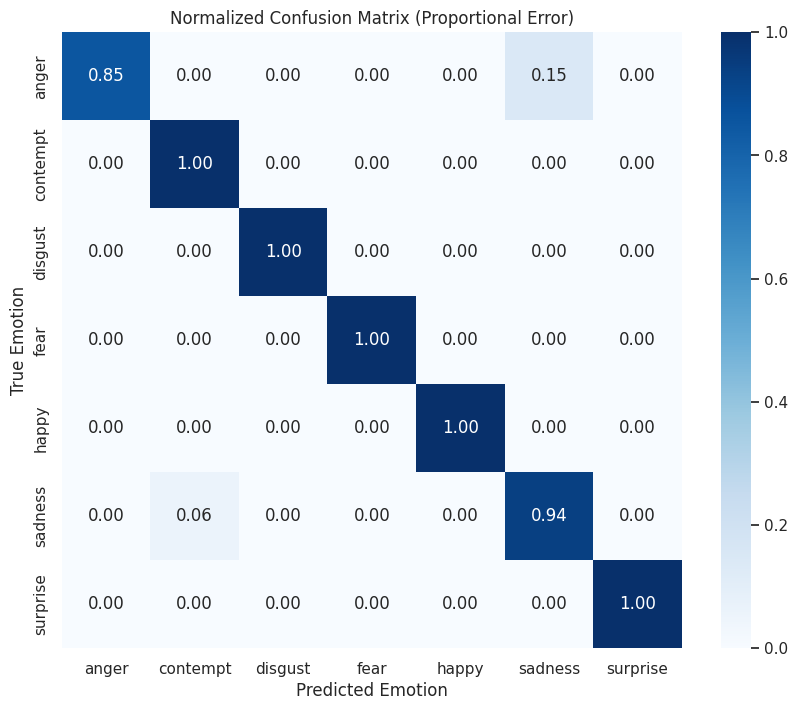

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Start of Fix: Ensure X_test and Y_test are correctly loaded ---
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Re-initialize the test data generator (if it might have been exhausted)
test_data_generator = ImageDataGenerator(rescale=1./255)
fer_test_data = test_data_generator.flow_from_directory(
    '/content/CK+48_test',  # Directory path for test images
    target_size = (48, 48),  # Resizes images to 48x48 pixels
    batch_size = 64,  # Number of images to yield per batch
    color_mode = 'rgb',  # Specifies that images are in rgb
    class_mode = 'categorical'  # Images are classified categorically
)

# Load all data from the test generator into NumPy arrays
all_X_test = []
all_y_test_one_hot = []

fer_test_data.reset() # Reset the generator to ensure it starts from the beginning

for _ in range(len(fer_test_data)):
    X_batch_test, y_batch_test_one_hot = next(fer_test_data)
    all_X_test.append(X_batch_test)
    all_y_test_one_hot.append(y_batch_test_one_hot)

X_test = np.concatenate(all_X_test)
Y_test = np.concatenate(all_y_test_one_hot)

# Convert one-hot encoded labels back to integer labels for y_test
y_test = np.argmax(Y_test, axis=1);
# --- End of Fix ---


# Make predictions on the test data
predictions = model.predict(X_test, verbose=0)

# Convert predictions from probabilities to class labels (integers)
y_pred_classes = np.argmax(predictions, axis=1)

# 1. Get predictions from the model (y_test, y_pred_classes, and test_labels are already available)
y_pred = y_pred_classes # Use the integer predicted classes
y_true = y_test        # Use the integer true labels
class_labels = list(fer_test_data.class_indices.keys()) # Get class names from the generator's class_indices

# 2. Print Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# 3. Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Normalize by row (Recall) to see error proportions
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = np.nan_to_num(cm_norm, nan=0.0) # Handle potential division by zero

# 5. Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Normalized Confusion Matrix (Proportional Error)')
plt.ylabel('True Emotion')
plt.xlabel('Predicted Emotion')
plt.savefig('normalized_confusion_matrix.png')
plt.show() # Added to display the plot if not already displayed


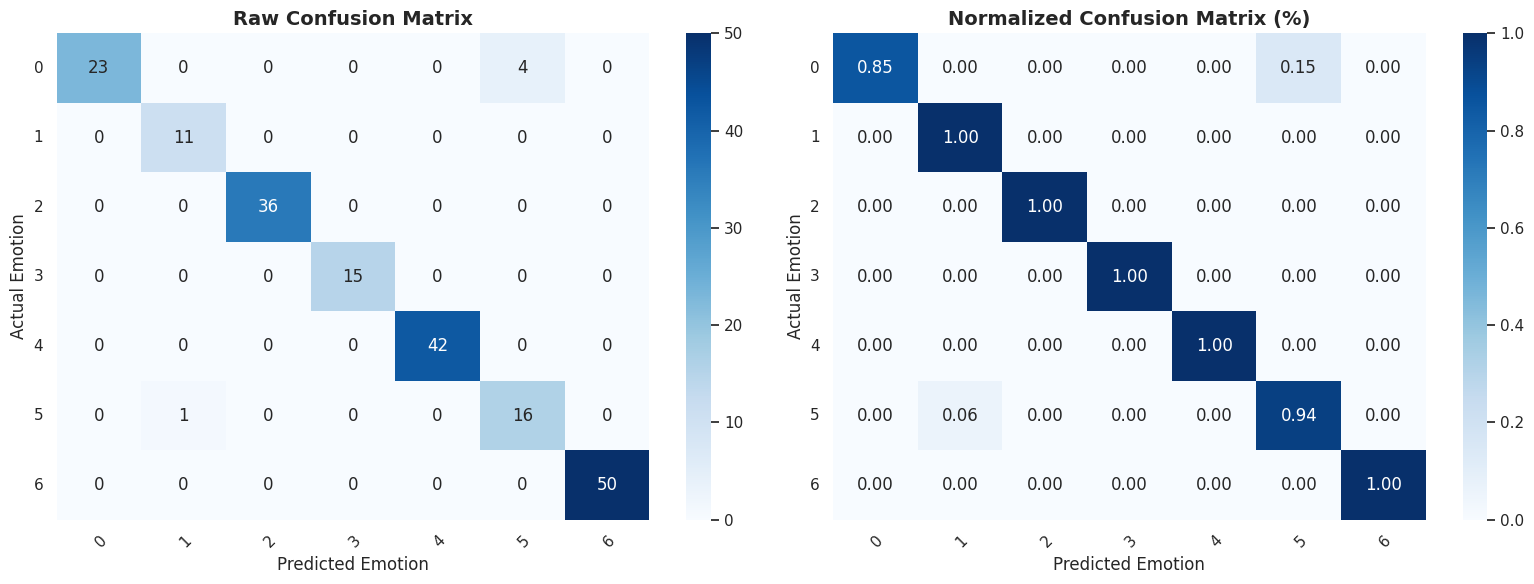

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ensure y_test and y_pred are properly calculated
y_test = np.argmax(Y_test, axis=1)
if 'predictions' not in locals():
    predictions = model.predict(X_test, verbose=0)
y_pred = np.argmax(predictions, axis=1)

# 2. Extract labels and compute matrices
class_labels = list(test_labels.keys())
cm = confusion_matrix(y_test, y_pred)
cm_norm = np.nan_to_num(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], nan=0.0)

# 3. Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Define labels for reuse
x_label = "Predicted Emotion"
y_label = "Actual Emotion"

# Raw Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=ax[0])
ax[0].set_title("Raw Confusion Matrix", fontsize=14, fontweight='bold')
ax[0].set_xlabel(x_label, fontsize=12)
ax[0].set_ylabel(y_label, fontsize=12)

# Normalized Matrix
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=ax[1])
ax[1].set_title("Normalized Confusion Matrix (%)", fontsize=14, fontweight='bold')
ax[1].set_xlabel(x_label, fontsize=12)
ax[1].set_ylabel(y_label, fontsize=12)

# 4. FIX: Rotate labels AFTER they are drawn by the heatmap
for axes in ax:
    plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.setp(axes.get_yticklabels(), rotation=0) # Keep Y labels horizontal for readability

plt.tight_layout()
plt.show()

In [41]:
#classification_report
from sklearn.metrics import classification_report
import numpy as np

# 1️⃣ Get predictions
y_pred_prob = model.predict(X_test)

# 2️⃣ Convert probabilities to class labels

# For multi-class (softmax output):
y_pred = np.argmax(y_pred_prob, axis=1)

# If y_test is one-hot encoded, convert it:
# y_test = np.argmax(y_test, axis=1)

# 3️⃣ Print report
print(classification_report(y_test, y_pred, digits=2))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        42
           5       0.80      0.94      0.86        17
           6       1.00      1.00      1.00        50

    accuracy                           0.97       198
   macro avg       0.96      0.97      0.96       198
weighted avg       0.98      0.97      0.98       198



# ROC Curve

In [42]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

In [43]:
new_label = list(test_labels.values())
final_label = new_label
new_class = NUM_CLASSES

In [44]:
# The y_pred variable is a list of strings, which does not have a .ravel() method.
# For ROC curve calculation, we need the raw prediction probabilities, which are in the 'predictions' array.
# The 'y_test' variable is a 1D array of integer labels, which needs to be one-hot encoded (using Y_test).
lw = 2

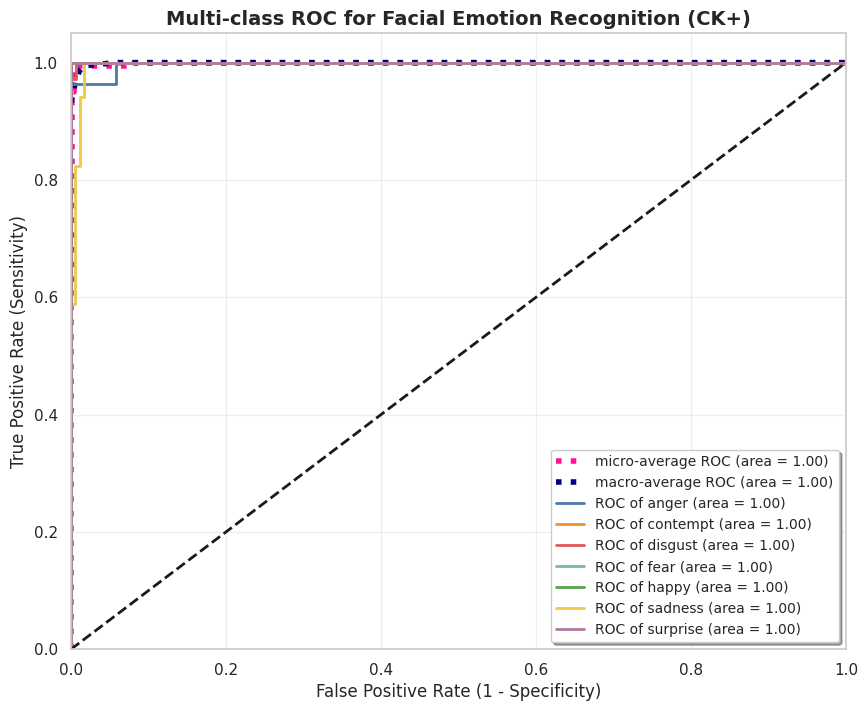

In [45]:
#To plot the ROC curve
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# Ensure predictions are available (e.g., from model.predict)
# X_test and Y_test are available from cell '7b1d3f83'
if 'predictions' not in locals():
    predictions = model.predict(X_test, verbose=0)

# 1. Setup variables
n_classes = NUM_CLASSES
lw = 2
plt.style.use('seaborn-v0_8-muted') # Cleaner, professional style

# 2. Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3. Compute Micro-average (aggregates all classes)
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 4. Compute Macro-average (mean of each class)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 5. Plotting
plt.figure(figsize=(10, 8))

# Plot special averages
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC (area = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC (area = {roc_auc["macro"]:0.2f})',
         color='navy', linestyle=':', linewidth=4)

# Plot individual emotion classes
colors = cycle(['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC of {final_label[i]} (area = {roc_auc[i]:0.2f})')

# Random chance line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Multi-class ROC for Facial Emotion Recognition (CK+)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize='small', frameon=True, shadow=True)
plt.grid(alpha=0.3)
plt.show()

[0.475      0.48101266 0.48717949 0.49350649 0.5        0.50666667
 0.5        0.49315068 0.5        0.50704225 0.51428571 0.50724638
 0.5        0.50746269 0.51515152 0.52307692 0.515625   0.50793651
 0.51612903 0.50819672 0.5        0.50847458 0.51724138 0.52631579
 0.53571429 0.54545455 0.55555556 0.54716981 0.53846154 0.54901961
 0.54       0.53061224 0.54166667 0.55319149 0.54347826 0.53333333
 0.52272727 0.53488372 0.52380952 0.53658537 0.525      0.51282051
 0.52631579 0.54054054 0.52777778 0.51428571 0.52941176 0.54545455
 0.5625     0.58064516 0.6        0.62068966 0.64285714 0.62962963
 0.61538462 0.64       0.66666667 0.69565217 0.72727273 0.71428571
 0.75       0.78947368 0.77777778 0.76470588 0.75       0.8
 0.78571429 0.76923077 0.83333333 0.81818182 0.8        0.77777778
 0.75       0.85714286 0.83333333 0.8        0.75       0.66666667
 0.5        1.         1.        ] [1.         1.         1.         1.         1.         1.
 0.97368421 0.94736842 0.94736842 0.947368

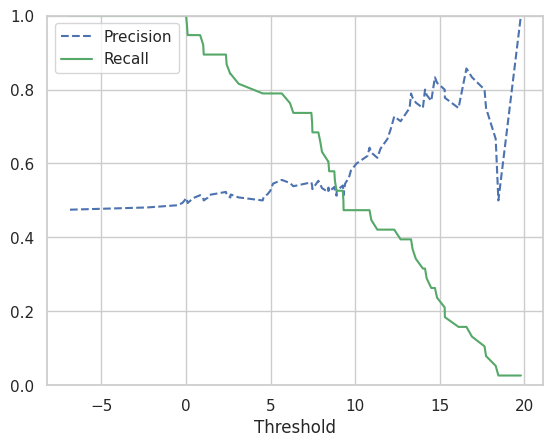

In [46]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier # Or any other classifier
from sklearn.model_selection import train_test_split
import numpy as np

# --- Assuming you have X_train and y_train defined ---
# For demonstration purposes, let's create some dummy data
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a classifier
# Here, we'll use an SGDClassifier, but replace with your actual model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# 2. Generate decision scores for the training set
# Use decision_function for models that provide it (like SGDClassifier, SVC)
# Or use predict_proba[:, 1] for models that provide probabilities (like LogisticRegression, RandomForestClassifier)
y_train_scores = sgd_clf.decision_function(X_train)

# Now, precision_recall_curve should work
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)
print(precisions, recalls, thresholds)

# Your plotting function (from your original code, if you have it)
def plot_precision_recall_curve(precisions, recalls, thresholds):
    import matplotlib.pyplot as plt
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

plot_precision_recall_curve(precisions, recalls, thresholds)

# Conclusion

This notebook has presented an approach to Facial Emotion Recognition (FER) using a 2D Convolutional Neural Network (CNN2D), demonstrating the power of deep learning in interpreting and classifying human emotions from facial expressions.

The model's impressive performance, achieving a 97.98% validation accuracy on the CK+ dataset, underscores the potential of CNN2D in accurately identifying emotions, even with a relatively small dataset.

However, it's important to recognize the limitations inherent in this study. The CK+ dataset, while high in quality, is limited in its size and diversity. This limitation raises questions about the model's generalizability and effectiveness when faced with more diverse and extensive datasets.
